In [ ]:
# install dependencies: 
!pip install pyyaml==5.1
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab

1.7.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# install detectron2: (Colab has CUDA 10.1 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
import torch
assert torch.__version__.startswith("1.7")
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls "/content/gdrive/My Drive/CS555 Project"

 coco_instances_results.json   ornek2.jpg   ornek.tif
 detectron2-master	       ornek3.tif  'PRImA Layout Analysis Dataset'
 instances_predictions.pth     ornek4.tif   publaynet
 model_final_trimmed.pth       ornek5.tif


In [ ]:
!cp "/content/gdrive/My Drive/CS555 Project/detectron2-master/configs/DLA_mask_rcnn_R_101_FPN_3x.yaml" "DLA_mask_rcnn_R_101_FPN_3x.yaml"

In [ ]:
!cp "/content/gdrive/My Drive/CS555 Project/model_final_trimmed.pth" "model_final_trimmed.pth"

In [ ]:
!cp -r "/content/gdrive/My Drive/CS555 Project/detectron2-master" "detectron2-master"

In [ ]:
!ls
%cd detectron2-master
!ls
%cd demo
!ls
%cd detectron2-master

detectron2-master		 gdrive			  sample_data
DLA_mask_rcnn_R_101_FPN_3x.yaml  model_final_trimmed.pth
/content/detectron2-master
assets	    detectron2-master	INSTALL.md	       projects   tools
configs     dev			LICENSE		       README.md
datasets    docker		MODEL_ZOO.md	       setup.cfg
demo	    docs		output_predicted5.png  setup.py
detectron2  GETTING_STARTED.md	PMC539300_00004.jpg    tests
/content/detectron2-master/demo
demo.py  PMC539300_00004.jpg  predictor.py  __pycache__  README.md
[Errno 2] No such file or directory: 'detectron2-master'
/content/detectron2-master/demo


In [ ]:

%cd "/content/detectron2-master"

/content/detectron2-master
assets	    detectron2-master	INSTALL.md	       projects   tools
configs     dev			LICENSE		       README.md
datasets    docker		MODEL_ZOO.md	       setup.cfg
demo	    docs		output_predicted5.png  setup.py
detectron2  GETTING_STARTED.md	PMC539300_00004.jpg    tests


In [ ]:
!cp "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/Images/00001276.tif" "00001276.tif"  

In [ ]:
!python demo/demo.py --config-file configs/DLA_mask_rcnn_R_101_FPN_3x.yaml --input "/content/detectron2-master/00001276.tif"  --output output_predicted5 --confidence-threshold 0.5 --opts MODEL.WEIGHTS "/content/model_final_trimmed.pth" MODEL.DEVICE cpu

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[01/06 20:51:31 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='configs/DLA_mask_rcnn_R_101_FPN_3x.yaml', input=['/content/detectron2-master/00001276.tif'], opts=['MODEL.WEIGHTS', '/content/model_final_trimmed.pth', 'MODEL.DEVICE', 'cpu'], output='output_predicted5', video_input=None, webcam=False)
WARNING [01/06 20:51:31 d2.config.compat]: Config 'configs/DLA_mask_rcnn_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the foll

In [ ]:
img = cv2.imread("output_predicted5.png")
cv2_imshow(img)

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dla_train", {}, "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/annotations.json", "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/Images")
register_coco_instances("dla_test", {}, "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/annotations.json", "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/Images")

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("dla_train", {}, "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/annotations.json", "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/Images")
register_coco_instances("dla_test", {}, "/content/gdrive/My Drive/CS555 Project/publaynet/val.json", "/content/gdrive/My Drive/CS555 Project/publaynet/val")

AssertionError: ignored

In [ ]:
%cd /content/detectron2-master

/content/detectron2-master


In [ ]:
from detectron2.engine import DefaultTrainer
cfg = get_cfg()
cfg.merge_from_file("configs/DLA_mask_rcnn_R_101_FPN_3x.yaml")
cfg.DATASETS.TEST = ("dla_test",)
cfg.DATASETS.TRAIN = ("dla_train",)
cfg.MODEL.WEIGHTS = "/content/model_final_trimmed.pth"
#cfg.DATALOADER.NUM_WORKERS = 4
#cfg.SOLVER.IMS_PER_BATCH = 4
#cfg.SOLVER.BASE_LR = 0.001

#cfg.SOLVER.WARMUP_ITERS = 1000
#cfg.SOLVER.MAX_ITER = 1500 #adjust up if val mAP is still rising, adjust down if overfit
#cfg.SOLVER.STEPS = (1000, 1500)
#cfg.SOLVER.GAMMA = 0.05

#cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
#cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6

#cfg.TEST.EVAL_PERIOD = 500


WARNING [01/05 18:20:43 d2.config.compat]: Config 'configs/DLA_mask_rcnn_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [ ]:
from detectron2.data import MetadataCatalog
MetadataCatalog.get("dla_val").thing_classes = ['Text','Title','List','Table','Figure']

In [ ]:
%cd /content/

/content/detectron2-master
/content
/content


In [ ]:
%cd /content/detectron2-master/


assets	    detectron2-master	INSTALL.md	       README.md
configs     dev			LICENSE		       setup.cfg
datasets    docker		MODEL_ZOO.md	       setup.py
demo	    docs		output_predicted5.png  tests
detectron2  GETTING_STARTED.md	projects	       tools
/content/detectron2-master
assets	    detectron2-master	INSTALL.md	       README.md
configs     dev			LICENSE		       setup.cfg
datasets    docker		MODEL_ZOO.md	       setup.py
demo	    docs		output_predicted5.png  tests
detectron2  GETTING_STARTED.md	projects	       tools


In [ ]:
!mkdir output

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
#predictor = DefaultPredictor(cfg)
#predictor.resume_or_load(resume=True)
evaluator = COCOEvaluator("dla_test", cfg, False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, "dla_test")

inference_on_dataset(trainer.model, test_loader, evaluator)

[01/05 18:21:18 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


[01/05 18:21:36 d2.evaluation.evaluator]: Inference done 11/11245. 0.1787 s / img. ETA=1:10:19
[01/05 18:21:41 d2.evaluation.evaluator]: Inference done 24/11245. 0.1784 s / img. ETA=1:13:30
[01/05 18:21:46 d2.evaluation.evaluator]: Inference done 36/11245. 0.1789 s / img. ETA=1:15:39
[01/05 18:21:51 d2.evaluation.evaluator]: Inference done 49/11245. 0.1787 s / img. ETA=1:15:30
[01/05 18:21:56 d2.evaluation.evaluator]: Inference done 64/11245. 0.1782 s / img. ETA=1:13:00
[01/05 18:22:02 d2.evaluation.evaluator]: Inference done 78/11245. 0.1782 s / img. ETA=1:12:34
[01/05 18:22:07 d2.evaluation.evaluator]: Inference done 92/11245. 0.1780 s / img. ETA=1:11:55
[01/05 18:22:12 d2.evaluation.evaluator]: Inference done 107/11245. 0.1782 s / img. ETA=1:10:50
[01/05 18:22:17 d2.evaluation.evaluator]: Inference done 122/11245. 0.1782 s / img. ETA=1:09:59
[01/05 18:22:22 d2.evaluation.evaluator]: Inference done 135/11245. 0.1782 s / img. ETA=1:10:04
[01/05 18:22:28 d2.evaluation.evaluator]: Infer

OrderedDict([('bbox',
              {'AP': 88.91651190809134,
               'AP-figure': 93.89328709281676,
               'AP-list': 82.8832085969075,
               'AP-table': 96.1763246394424,
               'AP-text': 90.49589162375239,
               'AP-title': 81.13384758753756,
               'AP50': 95.15648016418378,
               'AP75': 93.04750049954188,
               'APl': 93.56939287841735,
               'APm': 68.0641688853725,
               'APs': 32.99945550259195}),
             ('segm',
              {'AP': 86.539676116912,
               'AP-figure': 93.70953320640528,
               'AP-list': 73.98902206407318,
               'AP-table': 96.2660985805242,
               'AP-text': 89.91056235741823,
               'AP-title': 78.8231643761391,
               'AP50': 95.15745757389512,
               'AP75': 92.77105570282366,
               'APl': 91.13682529586768,
               'APm': 66.33253362140196,
               'APs': 32.55893557677666})])

In [ ]:
%cd output

/content/detectron2-master/output


In [ ]:
!cp coco_instances_results.json "/content/gdrive/My Drive/CS555 Project/coco_instances_results.json"

In [ ]:
!cp instances_predictions.pth "/content/gdrive/My Drive/CS555 Project/instances_predictions.pth"

In [ ]:
#!python demo/demo.py --config-file configs/DLA_mask_rcnn_R_101_FPN_3x.yaml --input "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/Images/00000398.tif"  --output output_predicted5 --confidence-threshold 0.5 --opts MODEL.WEIGHTS "/content/model_final_trimmed.pth" MODEL.DEVICE cpu
!python demo/demo.py --config-file configs/DLA_mask_rcnn_R_101_FPN_3x.yaml --input "/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/Images/00000398.tif"  --output output_predicted5 --confidence-threshold 0.5 --opts MODEL.WEIGHTS "/content/model_final_trimmed.pth" MODEL.DEVICE cpu

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

[01/01 17:52:17 detectron2]: Arguments: Namespace(confidence_threshold=0.5, config_file='configs/DLA_mask_rcnn_R_101_FPN_3x.yaml', input=['/content/gdrive/My Drive/CS555 Project/PRImA Layout Analysis Dataset/Images/00000398.tif'], opts=['MODEL.WEIGHTS', '/content/model_final_trimmed.pth', 'MODEL.DEVICE', 'cpu'], output='output_predicted5', video_input=None, webcam=False)
WARNING [01/01 17:52:17 d2.config.compat]: Config 'configs/DLA_mask_rcnn_R_101_FPN_3x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
  0% 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is depr

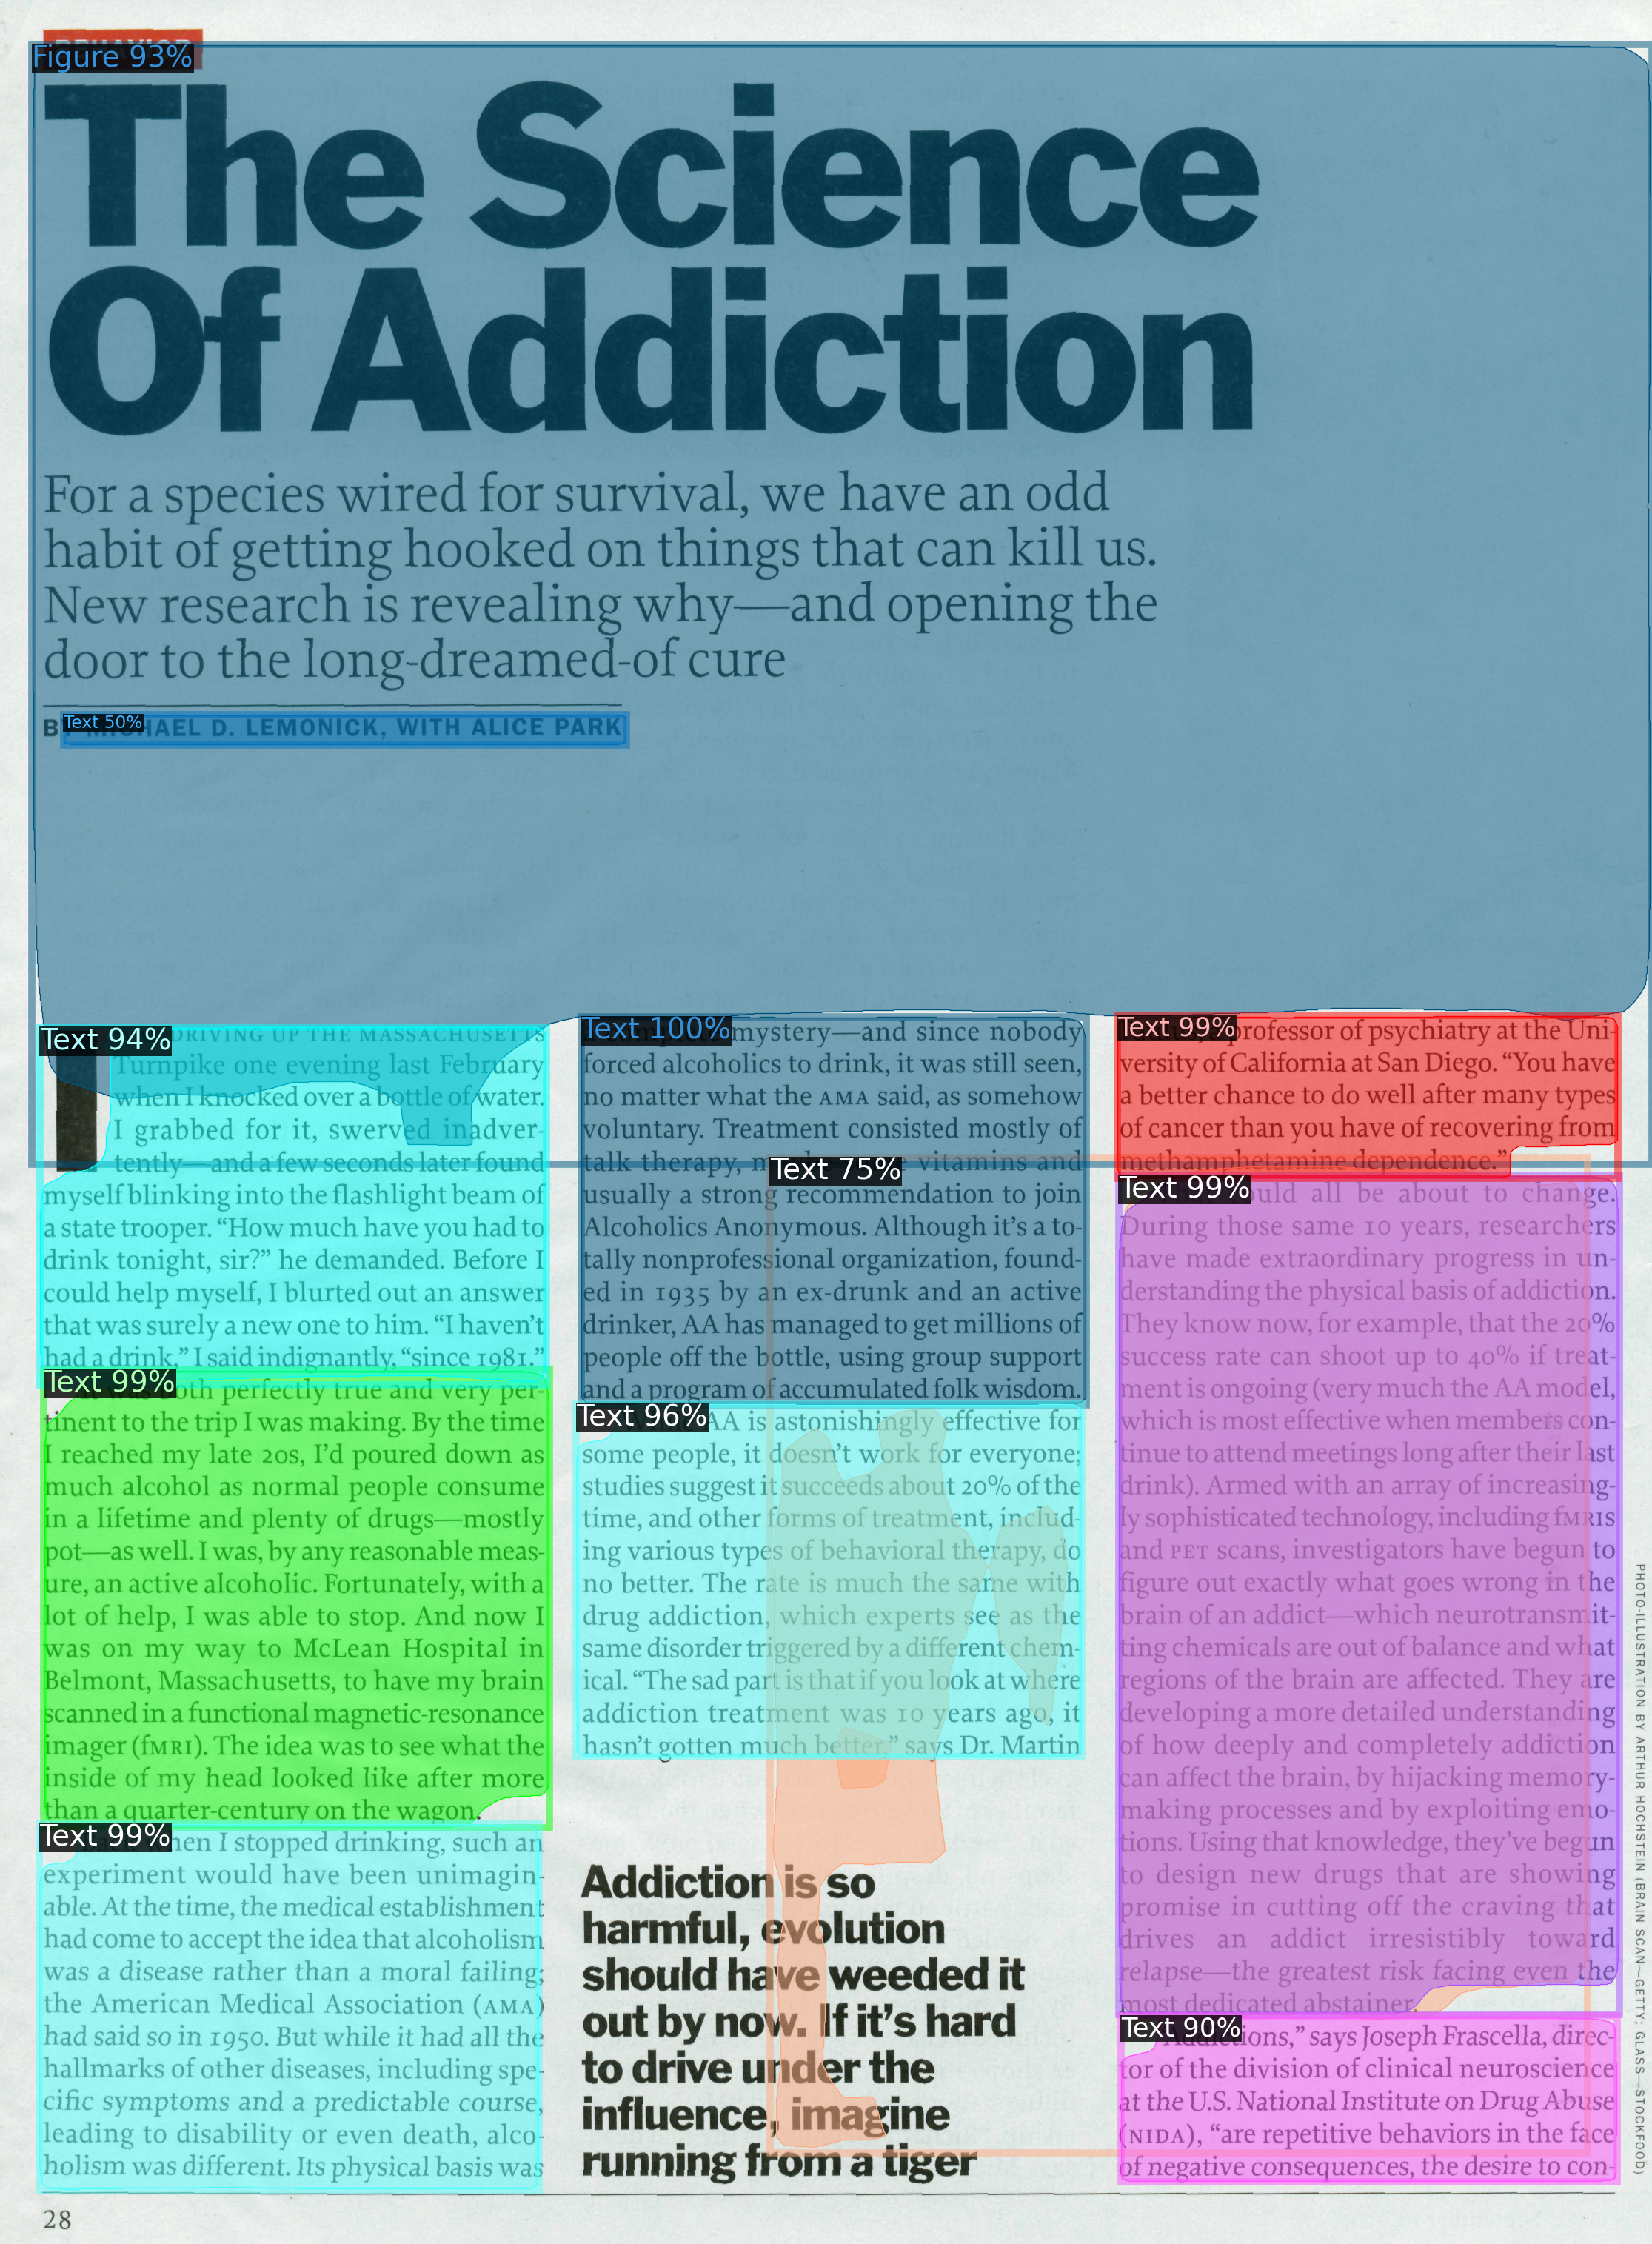

In [ ]:
img = cv2.imread("output_predicted5.png")
cv2_imshow(img)

In [ ]:
!cp -r output "/content/gdrive/My Drive/CS555 Project/output"

cp: cannot stat 'output': No such file or directory
